In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [34]:
month1 = pd.read_parquet('yellow_tripdata_2022-01.parquet')
month2 = pd.read_parquet('yellow_tripdata_2022-02.parquet')

In [35]:
month1.shape

(2463931, 19)

In [36]:
month1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [37]:
month1['duration'] = pd.to_datetime(month1.tpep_dropoff_datetime) - pd.to_datetime(month1.tpep_pickup_datetime)
month2['duration'] = pd.to_datetime(month2.tpep_dropoff_datetime) - pd.to_datetime(month2.tpep_pickup_datetime)

In [38]:
month1.duration = month1.duration.apply(lambda td: td.total_seconds() / 60)
month2.duration = month2.duration.apply(lambda td: td.total_seconds() / 60)

In [39]:
month1.duration.std()

46.44530513776802

In [40]:
month1.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
95%      3.193333e+01
98%      4.215000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [41]:
((month1.duration >= 1) & (month1.duration <=42)).mean()

0.9675867546615551

In [42]:
month1 = month1[(month1.duration >= 1) & (month1.duration <=60)]
month2 = month2[(month2.duration >= 1) & (month2.duration <= 60)]

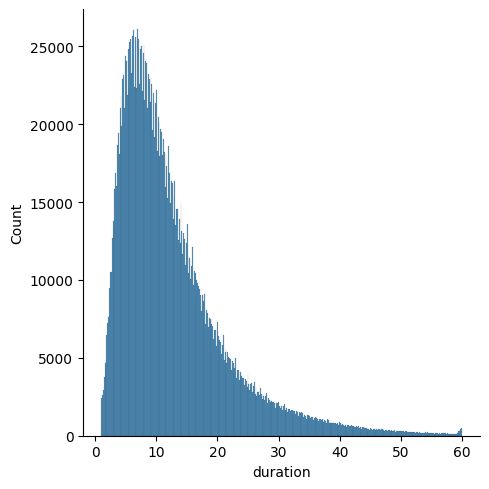

In [43]:
sns.displot(month1.duration)

In [44]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [45]:
month1[categorical] = month1[categorical].astype(str)
month2[categorical] = month2[categorical].astype(str)

In [46]:
month1['PU_DO'] = month1['PULocationID'] + '_' + month1['DOLocationID']

In [47]:
month2['PU_DO'] = month2['PULocationID'] + '_' + month2['DOLocationID']

In [48]:
single_cat = ['PU_DO']

In [49]:
train_dicts = month1[single_cat + numerical].to_dict(orient='records')

In [50]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [51]:
target = 'duration'
y_train = month1[target].values

In [52]:
X_train.shape

(2421440, 20667)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

4.79740100891272

In [54]:
val_dicts = month2[single_cat + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = month2[target].values

In [55]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

5.530086925753844